In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage.io import imread


CHANNELS = ['cy5', 'TxRed', 'cy3', 'FAM']
BASE_DIR = Path('E:/TMC/PRISM_pipeline/dataset/processed')
RUN_ID = '20230227_test'
src_dir = BASE_DIR / f'{RUN_ID}_processed'
stc_dir = src_dir / 'stitched'
read_dir = src_dir / 'readout'
os.makedirs(read_dir, exist_ok=True)

In [ ]:
intensity_all = pd.read_csv(read_dir/'intensity_all.csv')

In [ ]:
intensity_all['sum'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B']
intensity_all['sum_G'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B'] + intensity_all['Scaled_G']
#filter by sum value (QC)
#intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] < 500].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum_G'] < 500].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] > 50000].index)
#intensity_all.to_csv(read_dir/'PRISM_Spot_intensity.csv')
intensity_all['R/A'] = intensity_all['Scaled_R'] / intensity_all['sum']
intensity_all['Ye/A'] = intensity_all['Scaled_Ye'] / intensity_all['sum']
intensity_all['B/A'] = intensity_all['Scaled_B'] / intensity_all['sum']
intensity_all['G/A'] = intensity_all['Scaled_G'] / intensity_all['sum']
intensity_all['X_coor'] = 2*intensity_all['R/A'] - 1
intensity_all['Y_coor'] = intensity_all['B/A'] - intensity_all['Ye/A']

# gene calling

In [ ]:
#crosstalk elimination
intensity_all['B'] = intensity_all['B'] - intensity_all['G'] * 0.25 #0.35
intensity_all = np.maximum(intensity_all,0)
#intensity_all.to_csv(read_dir/'intensity_all_5x5_cross_corrected.csv')

#Scale
intensity_all['Scaled_R'] = intensity_all['R']
intensity_all['Scaled_Ye'] = intensity_all['Ye']
intensity_all['Scaled_G'] = intensity_all['G'] * 2.5
intensity_all['Scaled_B'] = intensity_all['B'] #* 4/3
intensity_all['sum'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B']
intensity_all['sum_G'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B'] + intensity_all['Scaled_G']

#filter by sum value (QC)
#intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] < 1000].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum_G'] < 1000].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] > 20000].index)
#intensity_all.to_csv(read_dir/'PRISM_Spot_intensity.csv')
intensity_all['R/A'] = intensity_all['Scaled_R'] / intensity_all['sum']
intensity_all['Ye/A'] = intensity_all['Scaled_Ye'] / intensity_all['sum']
intensity_all['B/A'] = intensity_all['Scaled_B'] / intensity_all['sum']
intensity_all['G/A'] = intensity_all['Scaled_G'] / intensity_all['sum']
#intensity_all = intensity_all.drop(intensity_all[intensity_all['G/A'] > 5].index) ########

intensity_all['X_coor'] = 2*intensity_all['R/A'] - 1
intensity_all['Y_coor'] = intensity_all['B/A'] - intensity_all['Ye/A']

In [ ]:
intensity_all = intensity_all.drop(intensity_all[intensity_all['G/A'] > 5].index)

In [ ]:
intensity_all

Y        X        R      Ye       G        B  Scaled_R  \
14        17109.0  20000.0  10654.0  2805.0     0.0  2756.00   10654.0   
15         6635.0  17821.0  10255.0  3654.0  1068.0  5956.00   10255.0   
20        20400.0  15349.0   9296.0   467.0     0.0     0.00    9296.0   
22        36852.0   9992.0   9224.0   418.0  8491.0    92.25    9224.0   
23        30043.0  17761.0   9191.0  2769.0   860.0  5119.00    9191.0   
...           ...      ...      ...     ...     ...      ...       ...   
17418174  24807.0  63903.0    368.0   208.0   117.0   964.75     368.0   
17418229   7991.0  69794.0    242.0     0.0   117.0   484.75     242.0   
17418313   2233.0  63044.0      0.0   630.0   117.0  1181.75       0.0   
17418329   8929.0  60358.0      0.0  2307.0   117.0     0.00       0.0   
17418398  17691.0  72158.0    598.0   538.0   117.0     0.00     598.0   

          Scaled_Ye  Scaled_G  Scaled_B       sum     sum_G       R/A  \
14           2805.0       0.0   2756.00  16215.00  16215.00  0.657046   
15           3654.0    2670.0   5956.00  19865.00  22535.00  0.516235   
20            467.0       0.0      0.00   9763.00   9763.00  0.952166   
22            418.0   21227.5     92.25   9734.25  30961.75  0.947582   
23           2769.0    2150.0   5119.00  17079.00  19229.00  0.538146   
...             ...       ...       ...       ...       ...       ...   
17418174      208.0     292.5    964.75   1540.75   1833.25  0.238845   
17418229        0.0     292.5    484.75    726.75   1019.25  0.332989   
17418313      630.0     292.5   1181.75   1811.75   2104.25  0.000000   
17418329     2307.0     292.5      0.00   2307.00   2599.50  0.000000   
17418398      538.0     292.5      0.00   1136.00   1428.50  0.526408   

              Ye/A       B/A       G/A    X_coor    Y_coor  
14        0.172988  0.169966  0.000000  0.314092 -0.003022  
15        0.183942  0.299824  0.134407  0.032469  0.115882  
20        0.047834  0.000000  0.000000  0.904333 -0.047834  
22        0.042941  0.009477  2.180702  0.895164 -0.033464  
23        0.162129  0.299725  0.125886  0.076293  0.137596  
...            ...       ...       ...       ...       ...  
17418174  0.134999  0.626156  0.189843 -0.522311  0.491157  
17418229  0.000000  0.667011  0.402477 -0.334021  0.667011  
17418313  0.347730  0.652270  0.161446 -1.000000  0.304540  
17418329  1.000000  0.000000  0.126788 -1.000000 -1.000000  
17418398  0.473592  0.000000  0.257482  0.052817 -0.473592  

[4455166 rows x 18 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
# fake data:

a = intensity_low['Y_coor']
b = intensity_low['X_coor']

plt.hist2d(a, b, (500, 500),norm = mpl.colors.LogNorm(),cmap=plt.cm.gnuplot2, vmin=8, vmax=500)
plt.colorbar()

plt.ylim([-1.2,1.2])
plt.xlim([-1.2,1.2])

plt.style.use('default')
plt.savefig(read_dir/'15_density_1.jpg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
# fake data:

a = intensity_all['Y_coor']
b = intensity_all['G/A']

plt.hist2d(a, b, (1000, 1000),norm = mpl.colors.LogNorm(),cmap=plt.cm.gnuplot2, vmin=5, vmax=200)
plt.colorbar()

plt.ylim([-0.2,2])
plt.xlim([-1.2,1.2])

plt.style.use('default')
plt.savefig(read_dir/'HL_density_1125.jpg')

[1.3423e+04 1.1200e+02 1.4500e+02 1.4600e+02 1.7000e+02 2.3500e+02
 3.0100e+02 3.9600e+02 4.0900e+02 5.5300e+02 6.4600e+02 6.9300e+02
 7.4600e+02 7.7600e+02 7.9700e+02 7.8300e+02 8.1900e+02 8.2700e+02
 8.6000e+02 9.1700e+02 9.4200e+02 9.5900e+02 9.2200e+02 1.0000e+03
 1.0810e+03 1.0260e+03 1.0670e+03 1.1340e+03 1.1790e+03 1.2120e+03
 1.2980e+03 1.3070e+03 1.4600e+03 1.3990e+03 1.4510e+03 1.3540e+03
 1.3820e+03 1.4850e+03 1.3330e+03 1.3580e+03 1.3380e+03 1.3410e+03
 1.2620e+03 1.1900e+03 1.1460e+03 1.1390e+03 1.0490e+03 1.0820e+03
 1.0490e+03 9.6200e+02 9.4200e+02 8.8600e+02 7.3500e+02 7.8900e+02
 7.5000e+02 6.8700e+02 6.0400e+02 6.0700e+02 6.1600e+02 6.2100e+02
 5.3400e+02 5.8300e+02 4.9000e+02 5.2700e+02 5.5500e+02 6.0300e+02
 6.3600e+02 6.3200e+02 6.4300e+02 7.6200e+02 7.8000e+02 8.6800e+02
 8.7700e+02 8.1800e+02 9.7000e+02 1.0740e+03 1.1320e+03 1.0810e+03
 1.2540e+03 1.2500e+03 1.3320e+03 1.4150e+03 1.3930e+03 1.2610e+03
 1.4830e+03 1.3580e+03 1.3760e+03 1.4310e+03 1.2470e+03 1.1440

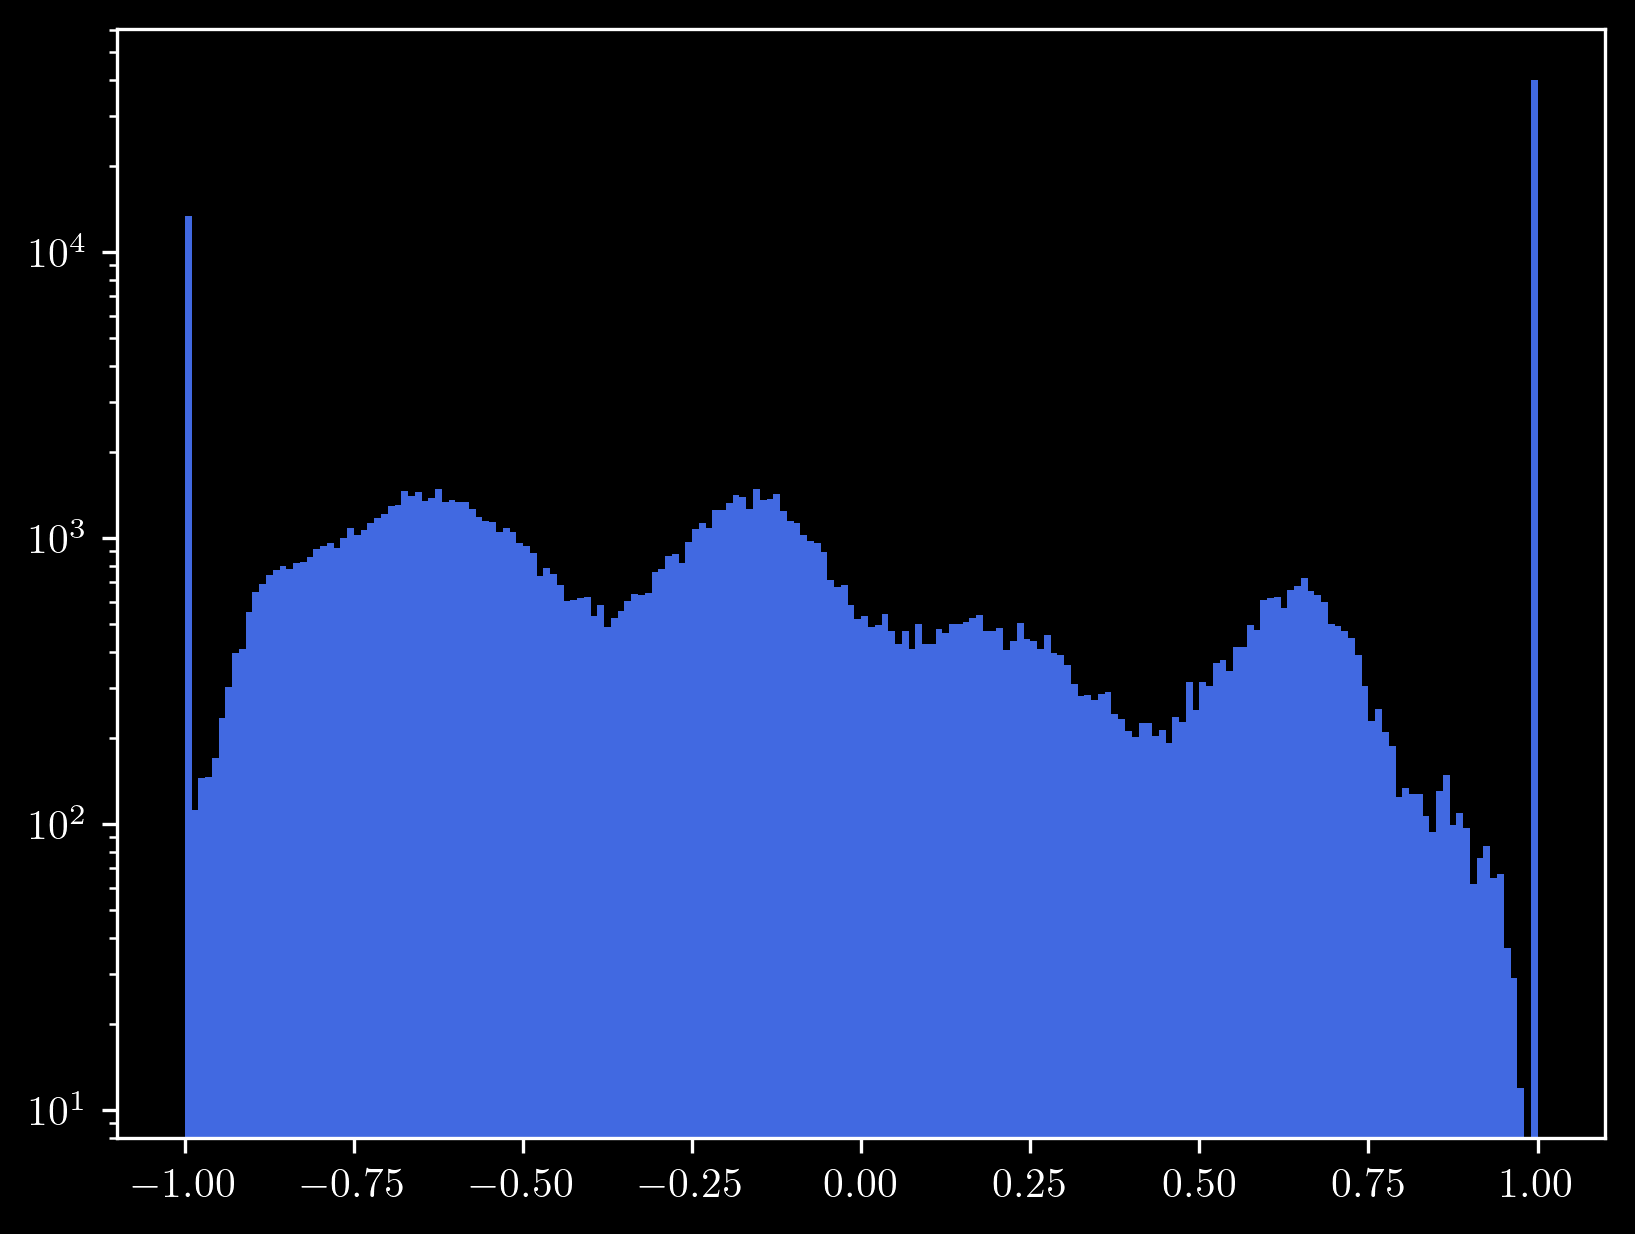

In [ ]:
RY = intensity_all[(intensity_all['R/A'] == 0)&(intensity_all['G/A'] >= 0.2)] 
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
})
plt.style.use('dark_background')
order = 5
extension = 0
hist = plt.hist(pd.DataFrame(RY['B/A']-RY['Ye/A']),bins =200,color='royalblue',log=True)
freq, bins = hist[0], hist[1]
extrema_less = argrelextrema(freq, np.less, order=order)[0] # assuming two side have 0, execute this code, or skip it
#extrema_less = np.insert(extrema_less, 0, 3)
#extrema_less = np.append(extrema_less, -3)
print(freq, bins, '\n', extrema_less)
bins_less = [(bins[extrema_less[i-1]+1]+extension, bins[extrema_less[i]]-extension) if i>0 else (bins[0], bins[1]) for i in range(len(extrema_less))]
bins_less.append((bins[-2], bins[-1]))
print(bins_less)
#plt.vlines([i[0] for i in bins_less], 0, 10000, linestyles='dashed', colors='red')
#plt.vlines([i[1] for i in bins_less], 0, 10000, linestyles='dashed', colors='green')
plt.savefig(read_dir/'BY_HH_PRISM.jpg')

In [ ]:
plt.style.use('default')
plt.scatter(intensity_all['Y_coor'],intensity_all['G/A'],s=0.001,alpha=0.05,linewidths=None)
plt.ylim([-0.1,5])
#plt.xlim([-1,1])
#plt.savefig(read_dir/'0G_1G.jpg')

(-0.1, 5.0)

In [ ]:
intensity_all.to_csv(read_dir/'Data_for_mCube_Thermo_E13.5_10um_Hyb5.csv')

In [ ]:
intensity_low = intensity_all[intensity_all['G/A']<=0.1]
intensity_medium = intensity_all.loc[(intensity_all['G/A']>=0.2)&(intensity_all['G/A']<=0.6)]
intensity_high = intensity_all[intensity_all['G/A']>=1]

In [ ]:
plt.scatter(intensity_low['Y_coor'],intensity_low['X_coor'],s=0.009,alpha=0.05,linewidths=None)
plt.savefig(read_dir/'triangle_0G.jpg')

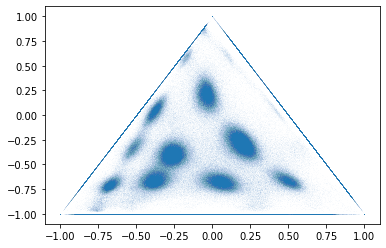

In [ ]:
plt.scatter(intensity_medium['Y_coor'],intensity_medium['X_coor'],s=0.009,alpha=0.05,linewidths=None)
plt.savefig(read_dir/'triangle_0.5G.jpg')

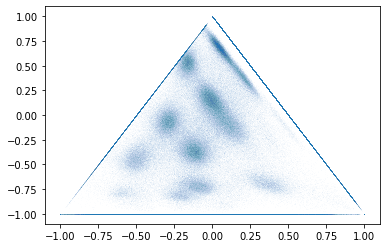

In [ ]:
plt.scatter(intensity_high['Y_coor'],intensity_high['X_coor'],s=0.009,alpha=0.05,linewidths=None)
plt.savefig(read_dir/'triangle_1G.jpg')

Peaks range of RY [(-1.0, -0.99), (-0.98, -0.42999999999999994), (-0.42000000000000004, -0.09999999999999998), (-0.08999999999999997, 0.3500000000000001), (0.3600000000000001, 0.8), (0.99, 1.0)] 

Peaks range of RB [(-1.0, -0.99), (-0.98, -0.63), (-0.62, -0.19999999999999996), (-0.18999999999999995, 0.3500000000000001), (0.99, 1.0)] 

Peaks range of BY [(-1.0, -0.99), (-0.98, -0.29000000000000004), (-0.28, 0.1200000000000001), (0.13000000000000012, 0.51), (0.52, 0.98), (0.99, 1.0)] 



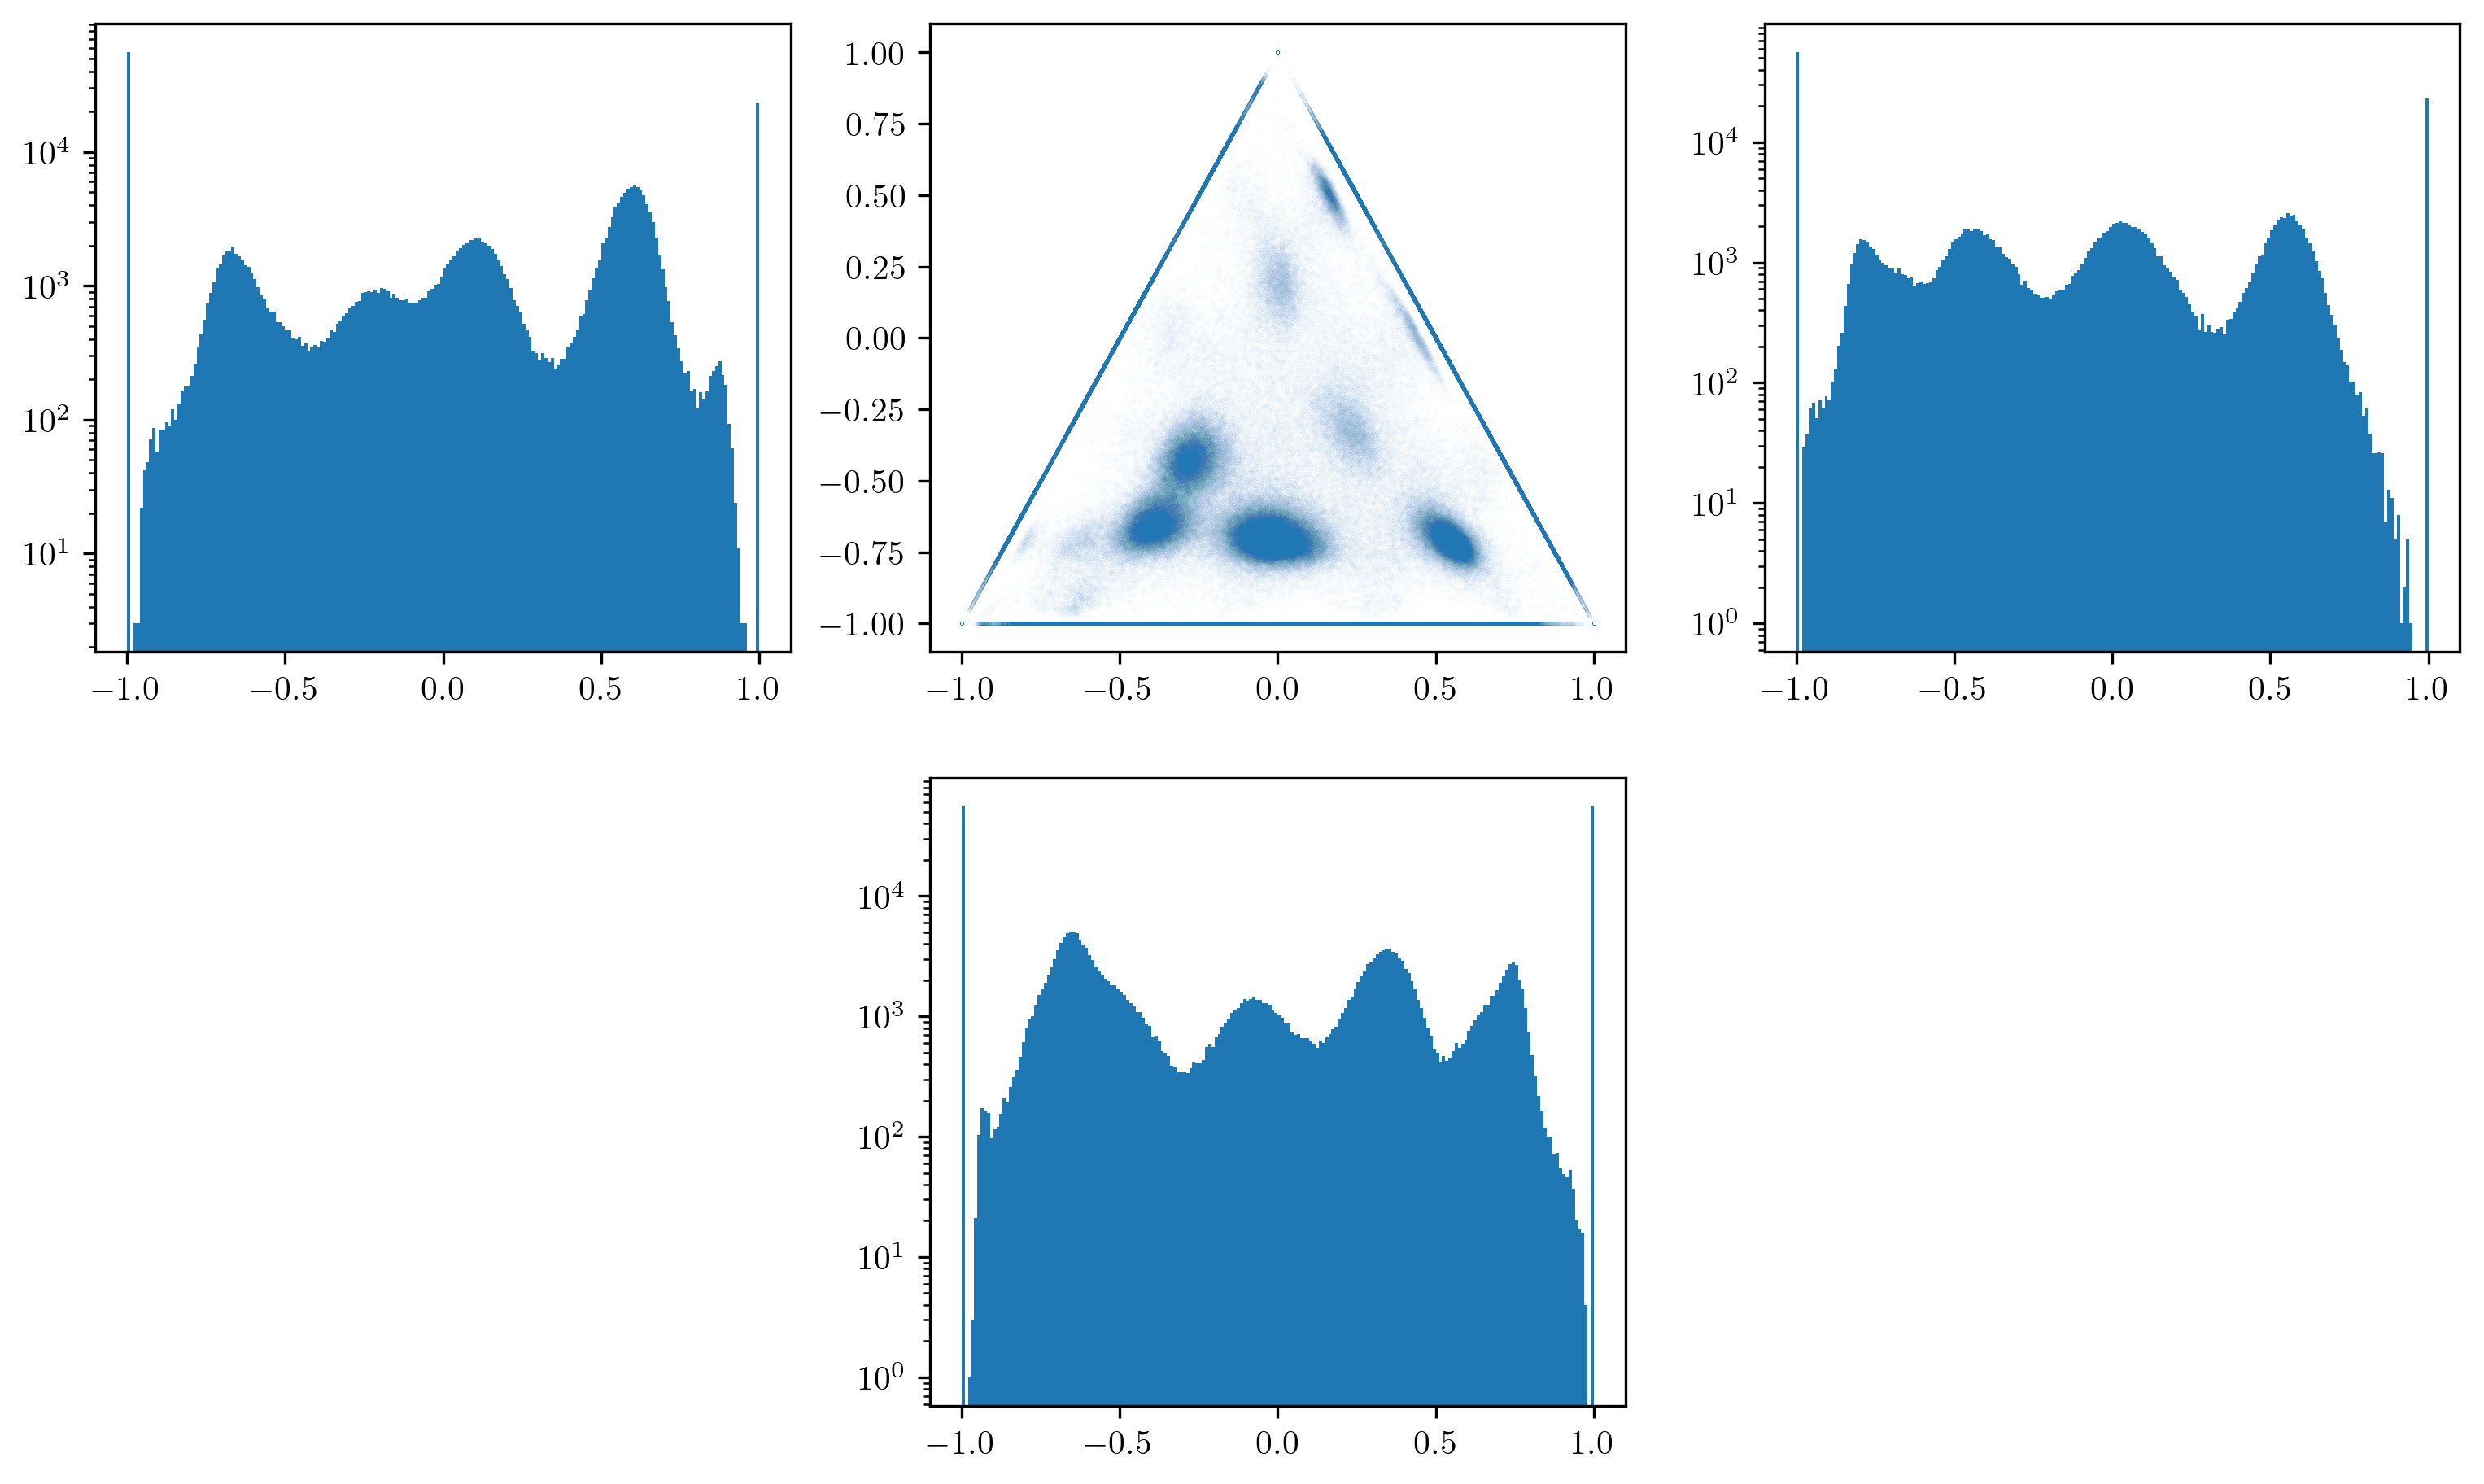

In [ ]:
from xml.dom.expatbuilder import InternalSubsetExtractor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
})


def plot_freq(intensity, colorline, layer='1G', layer_threshold=0.25, order=5, contraction=0, vlines=True, curvefit_range=None, curvefit_p0=None,curvefit_pvalue=0.05, curvefit_colorset=['red', 'yellow', 'green'], save=False, read_dir=None):
    '''
    Plot a frequency plot.

    Parameters
    -----------
    intensity: pandas dataframe.
    colorline: projection line. 'RY', 'RB' or 'BY'.
    layer: the 4th color. '0G' or '1G'.
    layer_threshold: threshold of the 4th color. For '0G', it is the upper limit. For '1G', it is the lower limit.
    order: how many points on each side to use for the comparison to consider. For details, see scipy.signal.argrelextrema.
    contraction: distance between two peaks (= contraction*2). 
    vlines: whether to plot peak boundaries or not.
    curvefit_range: peak range to fit curve.
    curvefit_p0: initial guess for the parameters (length N). For details, see scipy.optimize.curve_fit.
    save: whether to save the plot alone.
    read_dir: 
    '''
    
    def gaussian(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/(2*(sigma**2)))

    def mixgaussian(x, mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3):
        return gaussian(x, mu1, sigma1, A1) + gaussian(x, mu2, sigma2, A2) + gaussian(x, mu3, sigma3, A3)

    if layer == '0G':
        intensity = intensity[intensity['G/A'] <= layer_threshold]
    elif layer == '1G':
        intensity = intensity[intensity['G/A'] >= layer_threshold]

    if colorline == 'RY':
        intensity = intensity[intensity['B/A'] == 0] 
        intensity = intensity['R/A'] - intensity['Ye/A']
    elif colorline == 'RB':
        intensity = intensity[intensity['Ye/A'] == 0]
        intensity = intensity['R/A'] - intensity['B/A']
    elif colorline == 'BY':
        intensity = intensity[intensity['R/A'] == 0]
        intensity = intensity['B/A'] - intensity['Ye/A']

    hist = plt.hist(pd.DataFrame(intensity), bins = 200, log=True)
    freq, bins = hist[0], hist[1]
    extrema_less = argrelextrema(freq, np.less, order=order)[0] # assuming two side have 0, execute this code, or skip it
    # extrema_less = np.insert(extrema_less, 0, 3)
    # extrema_less = np.append(extrema_less, -3)
    bins_less = [(bins[extrema_less[i-1]+1]+contraction, bins[extrema_less[i]]-contraction) if i>0 else (bins[0], bins[1]) for i in range(len(extrema_less))]
    bins_less.append((bins[-2], bins[-1]))
    print('Peaks range of', colorline, bins_less, '\n')

    if vlines:
        plt.vlines([i[0] for i in bins_less], 0, 10000, linestyles='dashed', colors='red')
        plt.vlines([i[1] for i in bins_less], 0, 10000, linestyles='dashed', colors='green')

    if curvefit_range:
        confidence = 1 - curvefit_pvalue
        if confidence == 0.9:
            z = 1.28
        elif confidence == 0.95:
            z = 1.64

        start_idx, end_idx = curvefit_range[0], curvefit_range[1]
        bins_ = (bins[1:] + bins[:-1])/2 # for len(bins_) == len(freq)
        popt, pcov = curve_fit(mixgaussian, bins_[start_idx:end_idx], freq[start_idx:end_idx], p0=curvefit_p0, maxfev=1000000)
        # print('Fitting parameters: mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3\n', popt, '\n')
        # plt.plot(bins_[start_idx:end_idx], mixgaussian(bins_[start_idx:end_idx], *popt))

        # plot fitting curve separately: curve 1, curve 2, curve 3
        # curve 1
        mu, sigma, A = popt[0], popt[3], popt[6]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[0])
        print('Gaussian Curve 1: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 2
        mu, sigma, A = popt[1], popt[4], popt[7]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[1])
        print('Gaussian Curve 2: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 3
        mu, sigma, A = popt[2], popt[5], popt[8]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[2])
        print('Gaussian Curve 3: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])

    if save:
        if read_dir:
            plt.savefig(read_dir / (colorline+'_'+layer+'.jpg'))
        else:
            print('Input a read_dir to save the plot.\n') # Maybe a warning or error

# plots: scatter + frequency plot in three dimension
fig = plt.figure()    # 生成新的画布fig
fig.set_size_inches(12.5, 7.5)     # 调整画布为合适大小

p0 = [-1, 1, 1, 1, 3, 3]
plt.subplot(232)  # scatter
plt.scatter(intensity_low['Y_coor'], intensity_low['X_coor'], s=0.0009, alpha=0.08, linewidths=None)
plt.subplot(231)   # red-yellow
plot_freq(intensity_all, colorline='RY', layer='0G', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.05)#, curvefit_range=(10,190), curvefit_p0=(-0.5, 0, 0.5, 0.1, 0.1, 0.1, 1500, 500, 22000),curvefit_colorset=['gold', 'darkorange', 'orangered'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(233)   # red-blue
plot_freq(intensity_all, colorline='RB', layer='0G', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.1)#, curvefit_range=(10,190), curvefit_p0=(-0.7, -0.25, 0.35, 0.1, 0.1, 0.1, 5000, 5000, 5000),curvefit_colorset=['darkviolet', 'magenta', 'deeppink'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(235)   # yellow-blue
plot_freq(intensity_all, colorline='BY', layer='0G', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.1, save=True, read_dir=src_dir / 'readout')#, curvefit_range=(20,190), curvefit_p0=(-0.4, 0.2, 0.6, 0.1, 0.1, 0.1, 3000, 10000, 20000),curvefit_colorset=['greenyellow', 'springgreen', 'deepskyblue'], save=True, read_dir=src_dir / 'readout')

plt.show()

Peaks range of RY [(-1.0, -0.99), (-0.85, -0.17999999999999994), (-0.16999999999999993, 0.3800000000000001), (0.3900000000000001, 0.76), (0.99, 1.0)] 

Peaks range of RB [(-1.0, -0.99), (-0.6599999999999999, -0.44999999999999996), (-0.43999999999999995, 0.98), (0.99, 1.0)] 

Peaks range of BY [(-1.0, -0.99), (-0.37, -0.010000000000000009), (0.0, 0.6000000000000001), (0.99, 1.0)] 



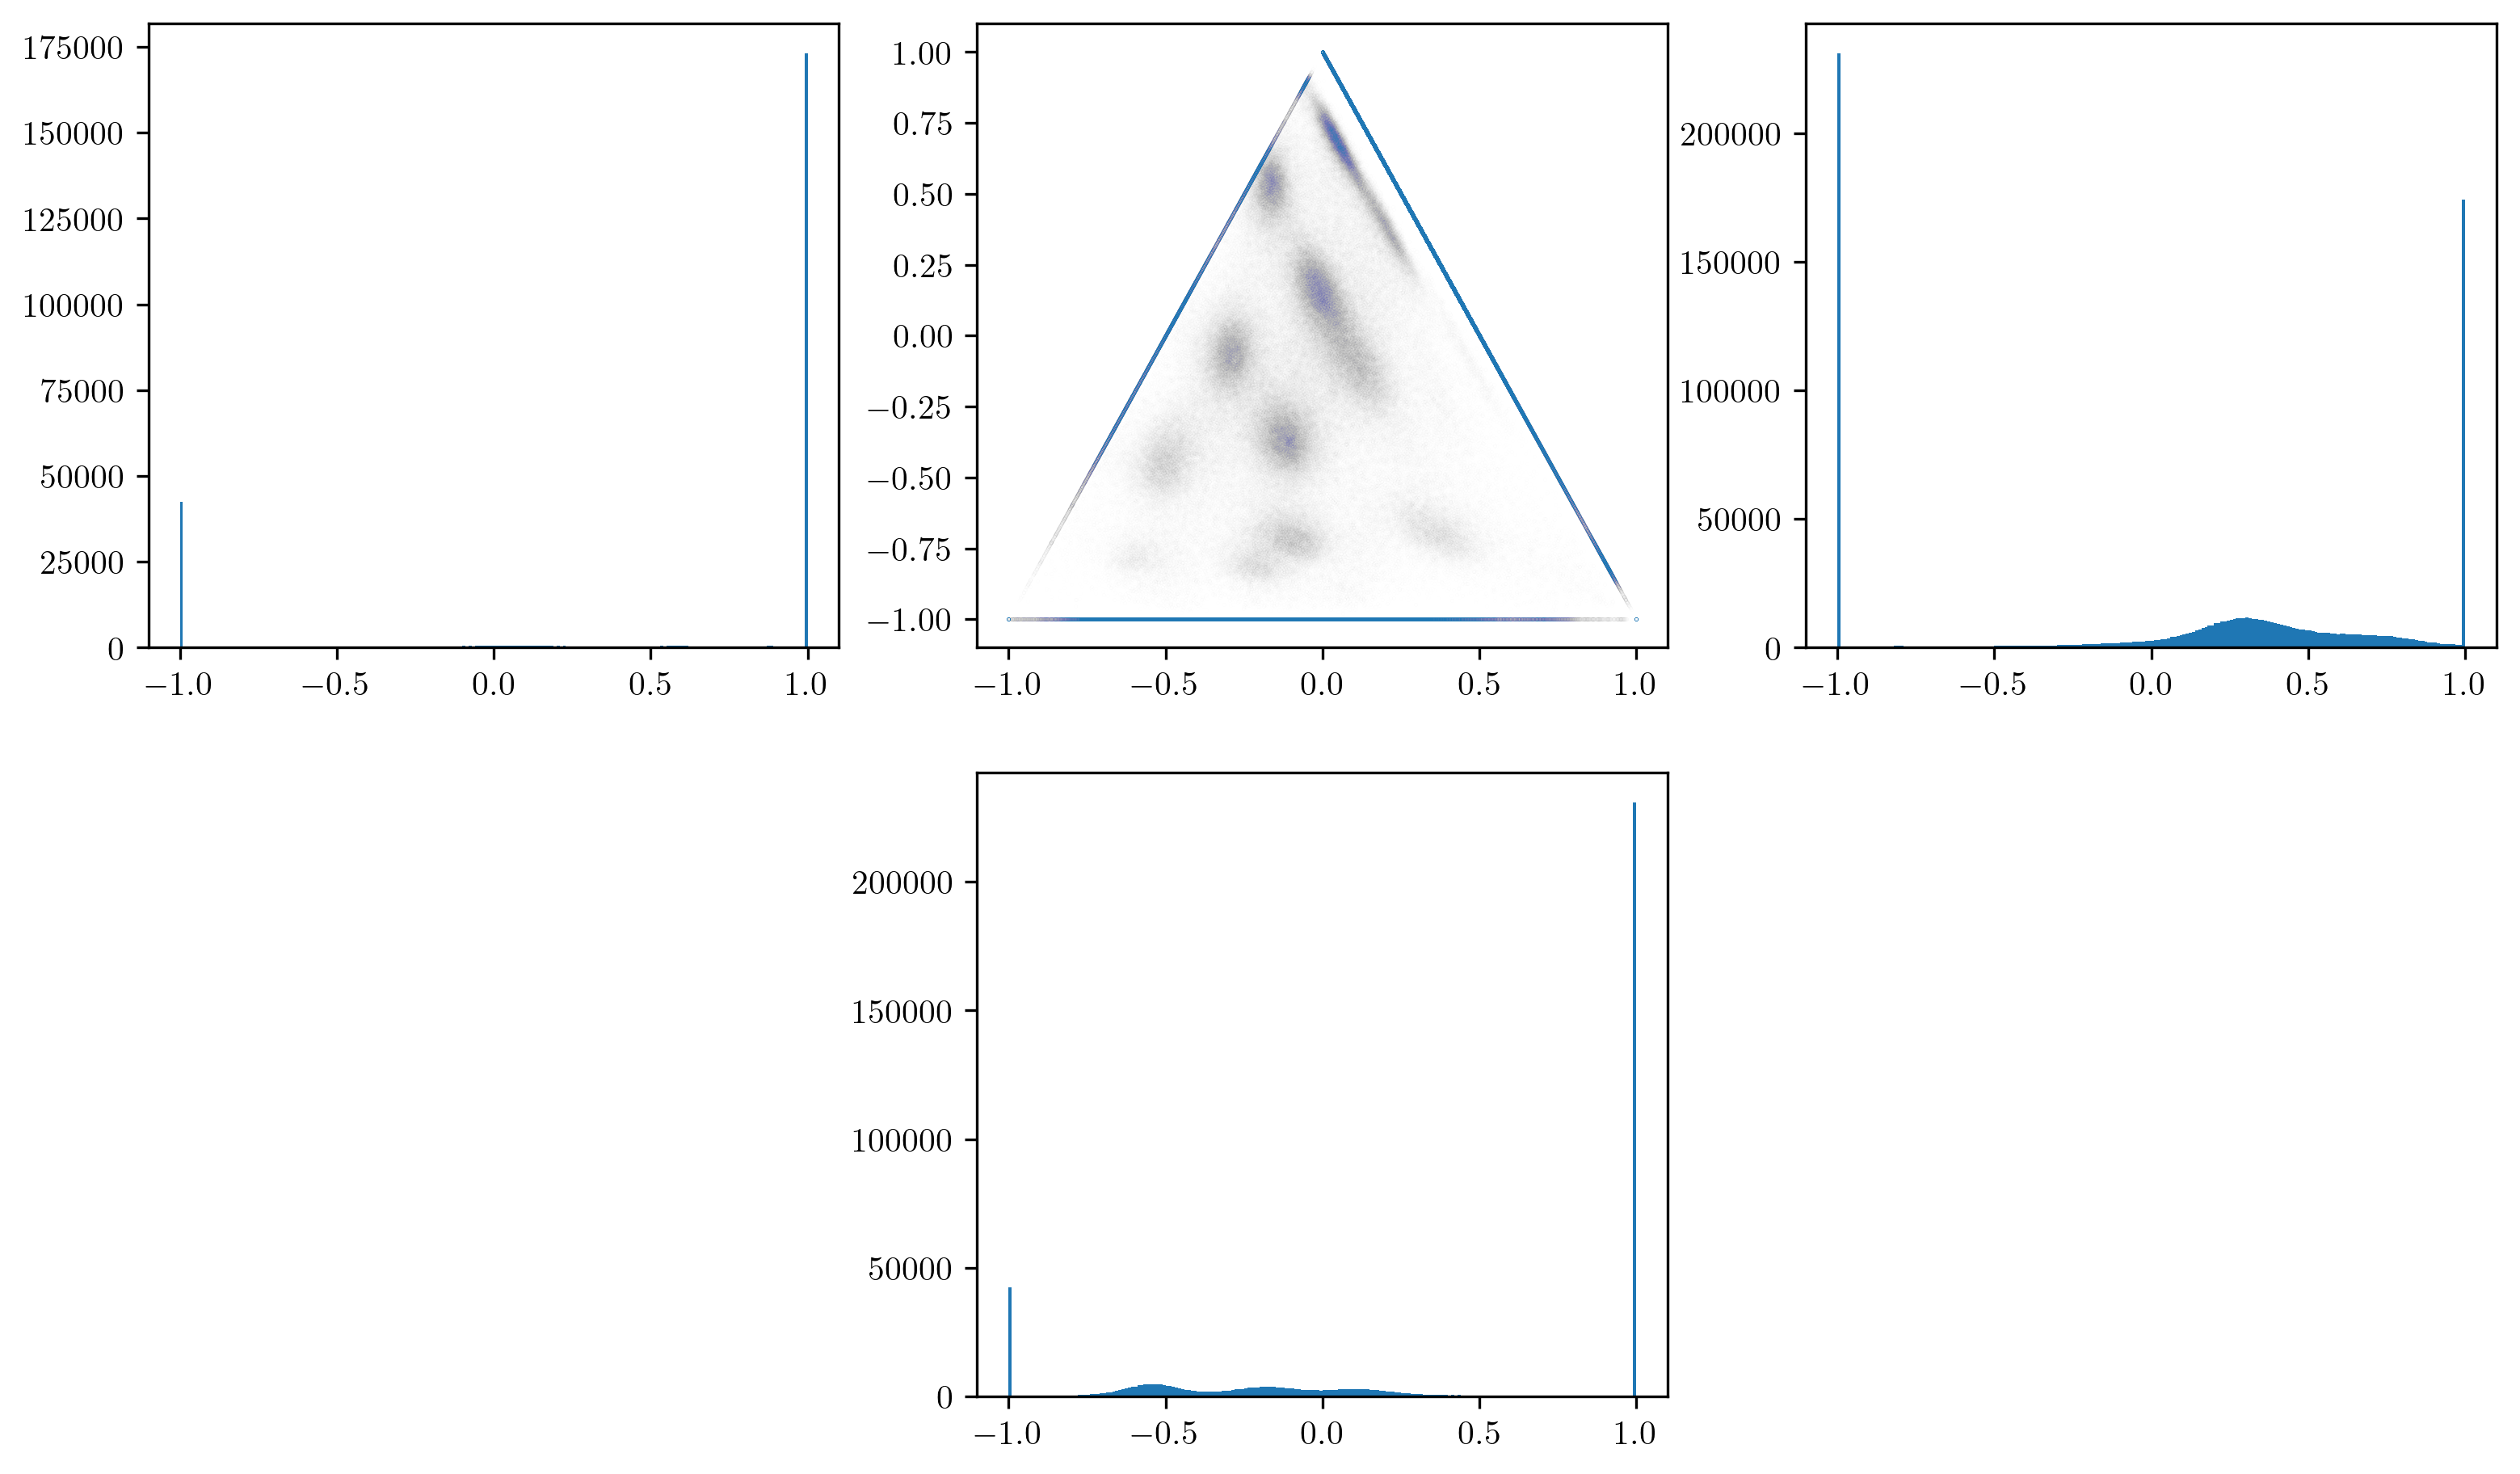

In [ ]:
from xml.dom.expatbuilder import InternalSubsetExtractor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
})


def plot_freq(intensity, colorline, layer='1G', layer_threshold=0.25, order=5, contraction=0, vlines=True, curvefit_range=None, curvefit_p0=None,curvefit_pvalue=0.1, curvefit_colorset=['red', 'yellow', 'green'], save=False, read_dir=None):
    '''
    Plot a frequency plot.

    Parameters
    -----------
    intensity: pandas dataframe.
    colorline: projection line. 'RY', 'RB' or 'BY'.
    layer: the 4th color. '0G' or '1G'.
    layer_threshold: threshold of the 4th color. For '0G', it is the upper limit. For '1G', it is the lower limit.
    order: how many points on each side to use for the comparison to consider. For details, see scipy.signal.argrelextrema.
    contraction: distance between two peaks (= contraction*2). 
    vlines: whether to plot peak boundaries or not.
    curvefit_range: peak range to fit curve.
    curvefit_p0: initial guess for the parameters (length N). For details, see scipy.optimize.curve_fit.
    save: whether to save the plot alone.
    read_dir: 
    '''
    
    def gaussian(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/(2*(sigma**2)))

    def mixgaussian(x, mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3):
        return gaussian(x, mu1, sigma1, A1) + gaussian(x, mu2, sigma2, A2) + gaussian(x, mu3, sigma3, A3)

    if layer == '0G':
        intensity = intensity[intensity['G/A'] <= layer_threshold]
    elif layer == '1G':
        intensity = intensity[intensity['G/A'] >= layer_threshold]

    if colorline == 'RY':
        intensity = intensity[intensity['B/A'] == 0] 
        intensity = intensity['R/A'] - intensity['Ye/A']
    elif colorline == 'RB':
        intensity = intensity[intensity['Ye/A'] == 0]
        intensity = intensity['R/A'] - intensity['B/A']
    elif colorline == 'BY':
        intensity = intensity[intensity['R/A'] == 0]
        intensity = intensity['B/A'] - intensity['Ye/A']

    hist = plt.hist(pd.DataFrame(intensity), bins = 200)
    freq, bins = hist[0], hist[1]
    extrema_less = argrelextrema(freq, np.less, order=order)[0] # assuming two side have 0, execute this code, or skip it
    # extrema_less = np.insert(extrema_less, 0, 3)
    # extrema_less = np.append(extrema_less, -3)
    bins_less = [(bins[extrema_less[i-1]+1]+contraction, bins[extrema_less[i]]-contraction) if i>0 else (bins[0], bins[1]) for i in range(len(extrema_less))]
    bins_less.append((bins[-2], bins[-1]))
    print('Peaks range of', colorline, bins_less, '\n')

    if vlines:
        plt.vlines([i[0] for i in bins_less], 0, 10000, linestyles='dashed', colors='red')
        plt.vlines([i[1] for i in bins_less], 0, 10000, linestyles='dashed', colors='green')

    if curvefit_range:
        confidence = 1 - curvefit_pvalue
        if confidence == 0.9:
            z = 1.28
        elif confidence == 0.95:
            z = 1.64
        start_idx, end_idx = curvefit_range[0], curvefit_range[1]
        bins_ = (bins[1:] + bins[:-1])/2 # for len(bins_) == len(freq)
        popt, pcov = curve_fit(mixgaussian, bins_[start_idx:end_idx], freq[start_idx:end_idx], p0=curvefit_p0, maxfev=1000000)
        # print('Fitting parameters: mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3\n', popt, '\n')
        # plt.plot(bins_[start_idx:end_idx], mixgaussian(bins_[start_idx:end_idx], *popt))

        # plot fitting curve separately: curve 1, curve 2, curve 3
        # curve 1
        mu, sigma, A = popt[0], popt[3], popt[6]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[0])
        print('Gaussian Curve 1: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 2
        mu, sigma, A = popt[1], popt[4], popt[7]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[1])
        print('Gaussian Curve 2: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 3
        mu, sigma, A = popt[2], popt[5], popt[8]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[2])
        print('Gaussian Curve 3: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])

    if save:
        if read_dir:
            plt.savefig(read_dir / (colorline+'_'+layer+'.jpg'))
        else:
            print('Input a read_dir to save the plot.\n') # Maybe a warning or error

# plots: scatter + frequency plot in three dimension
fig = plt.figure()    # 生成新的画布fig
fig.set_size_inches(12.5, 7.5)     # 调整画布为合适大小

p0 = [-1, 1, 1, 1, 3, 3]
plt.subplot(232)  # scatter
plt.scatter(intensity_high['Y_coor'], intensity_high['X_coor'], s=0.00009, alpha=0.08, linewidths=None)
plt.subplot(231)   # red-yellow
plot_freq(intensity_all, colorline='RY', layer='1G', layer_threshold=0.8, vlines=False)#, curvefit_range=(10,160), curvefit_p0=(-0.55, -0.05, 0.45, 0.1, 0.1, 0.1, 1000, 1000, 6000),curvefit_colorset=['gold', 'darkorange', 'orangered'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(233)   # red-blue
plot_freq(intensity_all, colorline='RB', layer='1G', layer_threshold=0.8, vlines=False)#, curvefit_range=(10,160), curvefit_p0=(-0.6, -0.25, 0.35, 0.1, 0.1, 0.1, 5000, 5000, 5000),curvefit_colorset=['darkviolet', 'magenta', 'deeppink'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(235)   # yellow-blue
plot_freq(intensity_all, colorline='BY', layer='1G', layer_threshold=0.8, vlines=False, save=True, read_dir=src_dir / 'readout')#, curvefit_range=(20,190), curvefit_p0=(-0.4, 0.2, 0.6, 0.1, 0.1, 0.1, 3000, 10000, 20000),curvefit_colorset=['greenyellow', 'springgreen', 'deepskyblue'], save=True, read_dir=src_dir / 'readout')

plt.show()

In [ ]:
#intensity_all['Gene'] = intensity_all['X_coor'].apply(lambda x: 'PRISM_1' if x >= 0.9 else 'Other')

In [ ]:
#E14.5 New version

G_Low_Thre = 0.15
G_High_Thre = 0.25

PRISM_1_XL = 0.83

PRISM_2_XL = 0.17
PRISM_2_XH = 0.79

PRISM_3_XL = -0.29
PRISM_3_XH = 0.16

PRISM_4_XL = -0.8
PRISM_4_XH = -0.33

PRISM_5_XH = -0.99

PRISM_6_XL = -0.83
PRISM_6_XH = -0.28

PRISM_7_XL = -0.27
PRISM_7_XH = 0.3

PRISM_8_XL = 0.44
PRISM_8_XH = 0.83

PRISM_9_XL = 0.99

PRISM_10_XL = -0.85
PRISM_10_XH = -0.35

PRISM_11_XL = -0.34
PRISM_11_XH = 0.19

PRISM_12_XL = 0.21
PRISM_12_XH = 0.75 #

PRISM_13_XL = -0.25
PRISM_13_XH = 0.22
PRISM_13_YL = -0.05
PRISM_13_YH = 0.22

PRISM_14_XL = -0.8
PRISM_14_XH = -0.5
PRISM_14_YL = -0.5
PRISM_14_YH = 0

PRISM_15_XL = -0.75
PRISM_15_XH = -0.5
PRISM_15_YL = 0.2
PRISM_15_YH = 0.5

PRISM_16_XL = 0.99 # 0.78 #0.76
#PRISM_16_XH = 0.75

PRISM_17_XL = 0.17
PRISM_17_XH = 0.73

PRISM_18_XL = -0.36
PRISM_18_XH = 0.16 #

PRISM_19_XL = -0.8
PRISM_19_XH = -0.37

PRISM_20_XH = -0.72 #contract!

PRISM_21_XL = -0.61
PRISM_21_XH = -0.16

PRISM_22_XL = -0.07
PRISM_22_XH = 0.09

PRISM_23_XL = 0.14
PRISM_23_XH = 0.8

PRISM_24_XL = 0.99

PRISM_25_XL = -0.8 #
PRISM_25_XH = -0.31

PRISM_26_XL = -0.26
PRISM_26_XH = 0.32

PRISM_27_XL = 0.43 # 0.32 before 12
PRISM_27_XH = 0.8 #

PRISM_28_XL = -0.25
PRISM_28_XH = 0.22
PRISM_28_YL = -0.1
PRISM_28_YH = 0.18

PRISM_29_XL = -0.8
PRISM_29_XH = -0.5
PRISM_29_YL = -0.4
PRISM_29_YH = -0.05

PRISM_30_XL = -0.75
PRISM_30_XH = -0.35 # after 4 # before HCC12 it was -0.4
PRISM_30_YL = 0.0
PRISM_30_YH = 0.45

PRISM_2_XL_Range = 0.9*PRISM_2_XL+0.1*PRISM_2_XH
PRISM_2_XH_Range = 0.1*PRISM_2_XL+0.9*PRISM_2_XH
PRISM_3_XL_Range = 0.9*PRISM_3_XL+0.1*PRISM_3_XH
PRISM_3_XH_Range = 0.1*PRISM_3_XL+0.9*PRISM_3_XH
PRISM_4_XL_Range = 0.9*PRISM_4_XL+0.1*PRISM_4_XH
PRISM_4_XH_Range = 0.1*PRISM_4_XL+0.9*PRISM_4_XH
PRISM_6_XL_Range = 0.9*PRISM_6_XL+0.1*PRISM_6_XH
PRISM_6_XH_Range = 0.1*PRISM_6_XL+0.9*PRISM_6_XH
PRISM_7_XL_Range = 0.9*PRISM_7_XL+0.1*PRISM_7_XH
PRISM_7_XH_Range = 0.1*PRISM_7_XL+0.9*PRISM_7_XH
PRISM_8_XL_Range = 0.9*PRISM_8_XL+0.1*PRISM_8_XH
PRISM_8_XH_Range = 0.1*PRISM_8_XL+0.9*PRISM_8_XH
PRISM_10_XL_Range = 0.9*PRISM_10_XL+0.1*PRISM_10_XH
PRISM_10_XH_Range = 0.1*PRISM_10_XL+0.9*PRISM_10_XH
PRISM_11_XL_Range = 0.9*PRISM_11_XL+0.1*PRISM_11_XH
PRISM_11_XH_Range = 0.1*PRISM_11_XL+0.9*PRISM_11_XH
PRISM_12_XL_Range = 0.9*PRISM_12_XL+0.1*PRISM_12_XH
PRISM_12_XH_Range = 0.1*PRISM_12_XL+0.9*PRISM_12_XH

#PRISM_16_XL_Range = 0.9*PRISM_16_XL+0.1*PRISM_16_XH
#PRISM_16_XH_Range = 0.1*PRISM_16_XL+0.9*PRISM_16_XH
PRISM_17_XL_Range = 0.9*PRISM_17_XL+0.1*PRISM_17_XH
PRISM_17_XH_Range = 0.1*PRISM_17_XL+0.9*PRISM_17_XH
PRISM_18_XL_Range = 0.9*PRISM_18_XL+0.1*PRISM_18_XH
PRISM_18_XH_Range = 0.1*PRISM_18_XL+0.9*PRISM_18_XH
PRISM_19_XL_Range = 0.9*PRISM_19_XL+0.1*PRISM_19_XH
PRISM_19_XH_Range = 0.1*PRISM_19_XL+0.9*PRISM_19_XH
PRISM_21_XL_Range = 0.9*PRISM_21_XL+0.1*PRISM_21_XH
PRISM_21_XH_Range = 0.1*PRISM_21_XL+0.9*PRISM_21_XH
PRISM_22_XL_Range = 0.9*PRISM_22_XL+0.1*PRISM_22_XH
PRISM_22_XH_Range = 0.1*PRISM_22_XL+0.9*PRISM_22_XH
PRISM_23_XL_Range = 0.9*PRISM_23_XL+0.1*PRISM_23_XH
PRISM_23_XH_Range = 0.1*PRISM_23_XL+0.9*PRISM_23_XH
PRISM_25_XL_Range = 0.9*PRISM_25_XL+0.1*PRISM_25_XH
PRISM_25_XH_Range = 0.1*PRISM_25_XL+0.9*PRISM_25_XH
PRISM_26_XL_Range = 0.9*PRISM_26_XL+0.1*PRISM_26_XH
PRISM_26_XH_Range = 0.1*PRISM_26_XL+0.9*PRISM_26_XH
PRISM_27_XL_Range = 0.9*PRISM_27_XL+0.1*PRISM_27_XH
PRISM_27_XH_Range = 0.1*PRISM_27_XL+0.9*PRISM_27_XH

intensity_all['Gene'] = 'Other'
intensity_all.loc[(intensity_all.X_coor >= PRISM_1_XL)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_1'
intensity_all.loc[(intensity_all.X_coor >= PRISM_2_XL_Range)&(intensity_all.X_coor <= PRISM_2_XH_Range)&(intensity_all.Y_coor >= (PRISM_2_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_2_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_2'
intensity_all.loc[(intensity_all.X_coor >= PRISM_3_XL_Range)&(intensity_all.X_coor <= PRISM_3_XH_Range)&(intensity_all.Y_coor >= (PRISM_3_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_3_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_3'
intensity_all.loc[(intensity_all.X_coor >= PRISM_4_XL_Range)&(intensity_all.X_coor <= PRISM_4_XH_Range)&(intensity_all.Y_coor >= (PRISM_4_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_4_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_4'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor <= PRISM_5_XH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_5'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_6_XL_Range)&(intensity_all.Y_coor <= PRISM_6_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_6'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_7_XL_Range)&(intensity_all.Y_coor <= PRISM_7_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_7'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_8_XL_Range)&(intensity_all.Y_coor <= PRISM_8_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_8'
intensity_all.loc[(intensity_all.X_coor <= -0.999)&(intensity_all.Y_coor >= PRISM_9_XL)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_9'
intensity_all.loc[(intensity_all.X_coor >= PRISM_10_XL_Range)&(intensity_all.X_coor <= PRISM_10_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_10_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_10_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_10'
intensity_all.loc[(intensity_all.X_coor >= PRISM_11_XL_Range)&(intensity_all.X_coor <= PRISM_11_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_11_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_11_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_11'
intensity_all.loc[(intensity_all.X_coor >= PRISM_12_XL_Range)&(intensity_all.X_coor <= PRISM_12_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_12_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_12_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_12'
intensity_all.loc[(intensity_all.X_coor >= PRISM_13_XL)&(intensity_all.X_coor <= PRISM_13_XH)&(intensity_all.Y_coor >= PRISM_13_YL)&(intensity_all.Y_coor <= PRISM_13_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_13'
intensity_all.loc[(intensity_all.X_coor >= PRISM_14_XL)&(intensity_all.X_coor <= PRISM_14_XH)&(intensity_all.Y_coor >= PRISM_14_YL)&(intensity_all.Y_coor <= PRISM_14_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_14'
intensity_all.loc[(intensity_all.X_coor >= PRISM_15_XL)&(intensity_all.X_coor <= PRISM_15_XH)&(intensity_all.Y_coor >= PRISM_15_YL)&(intensity_all.Y_coor <= PRISM_15_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_15'

intensity_all.loc[(intensity_all.X_coor >= PRISM_16_XL)&(intensity_all.Y_coor <= 0)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_16'
#intensity_all.loc[(intensity_all.X_coor >= PRISM_16_XL_Range)&(intensity_all.X_coor <= PRISM_16_XH)&(intensity_all.Y_coor >= (PRISM_16_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_16_XH_Range-1)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_16'
intensity_all.loc[(intensity_all.X_coor >= PRISM_17_XL_Range)&(intensity_all.X_coor <= PRISM_17_XH)&(intensity_all.Y_coor >= (PRISM_17_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_17_XH_Range-1)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_17'
intensity_all.loc[(intensity_all.X_coor >= PRISM_18_XL_Range)&(intensity_all.X_coor <= PRISM_18_XH_Range)&(intensity_all.Y_coor >= (PRISM_18_XL_Range-1)/2)&(intensity_all.Y_coor <= -0.3)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_18'
intensity_all.loc[(intensity_all.X_coor >= PRISM_19_XL_Range)&(intensity_all.X_coor <= PRISM_19_XH_Range)&(intensity_all.Y_coor >=  (PRISM_19_XL_Range-1)/2)&(intensity_all.Y_coor <= -0.46)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_19'

intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor <= PRISM_20_XH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_20'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_21_XL_Range)&(intensity_all.Y_coor <= PRISM_21_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_21'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_22_XL_Range)&(intensity_all.Y_coor <= PRISM_22_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_22'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_23_XL_Range)&(intensity_all.Y_coor <= PRISM_23_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_23'
intensity_all.loc[(intensity_all.X_coor <= -0.999)&(intensity_all.Y_coor >= PRISM_24_XL)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_24'
intensity_all.loc[(intensity_all.X_coor >= PRISM_25_XL_Range)&(intensity_all.X_coor <= PRISM_25_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_25_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_25_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_25'
intensity_all.loc[(intensity_all.X_coor >= PRISM_26_XL_Range)&(intensity_all.X_coor <= PRISM_26_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_26_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_26_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_26'
intensity_all.loc[(intensity_all.X_coor >= PRISM_27_XL_Range)&(intensity_all.X_coor <= PRISM_27_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_27_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_27_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_27'
intensity_all.loc[(intensity_all.X_coor >= PRISM_28_XL)&(intensity_all.X_coor <= PRISM_28_XH)&(intensity_all.Y_coor >= PRISM_28_YL)&(intensity_all.Y_coor <= PRISM_28_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_28'
intensity_all.loc[(intensity_all.X_coor >= PRISM_29_XL)&(intensity_all.X_coor <= PRISM_29_XH)&(intensity_all.Y_coor >= PRISM_29_YL)&(intensity_all.Y_coor <= PRISM_29_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_29'
intensity_all.loc[(intensity_all.X_coor >= PRISM_30_XL)&(intensity_all.X_coor <= PRISM_30_XH)&(intensity_all.Y_coor >= PRISM_30_YL)&(intensity_all.Y_coor <= PRISM_30_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_30'
intensity_all.loc[(intensity_all['G/A'] >= 10),'Gene'] = 'PRISM_31'

In [ ]:
####E14.5 New version

G_Low_Thre = 0.12
G_High_Thre = 0.25

PRISM_1_XL = 0.83

PRISM_2_XL = 0.24
PRISM_2_XH = 0.79

PRISM_3_XL = -0.32
PRISM_3_XH = 0.22

PRISM_4_XL = -0.83
PRISM_4_XH = -0.33

PRISM_5_XH = -0.99

PRISM_6_XL = -0.88
PRISM_6_XH = -0.1

PRISM_7_XL = -0.09
PRISM_7_XH = 0.4

PRISM_8_XL = 0.5
PRISM_8_XH = 0.87

PRISM_9_XL = 0.99

PRISM_10_XL = -0.92
PRISM_10_XH = -0.46

PRISM_11_XL = -0.45
PRISM_11_XH = 0.1

PRISM_12_XL = 0.11
PRISM_12_XH = 0.65 #

PRISM_13_XL = -0.25
PRISM_13_XH = 0.23
PRISM_13_YL = 0
PRISM_13_YH = 0.24

PRISM_14_XL = -0.75
PRISM_14_XH = -0.5
PRISM_14_YL = -0.35
PRISM_14_YH = 0

PRISM_15_XL = -0.75
PRISM_15_XH = -0.5
PRISM_15_YL = 0.3
PRISM_15_YH = 0.55

PRISM_16_XL = 0.78 # 0.78

PRISM_17_XL = 0.25
PRISM_17_XH = 0.65

PRISM_18_XL = -0.29
PRISM_18_XH = 0.2 #

PRISM_19_XL = -0.75
PRISM_19_XH = -0.3

PRISM_20_XH = -0.65 #contract!

PRISM_21_XL = -0.55
PRISM_21_XH = -0.15

PRISM_22_XL = -0.05
PRISM_22_XH = 0.2

PRISM_23_XL = 0.25
PRISM_23_XH = 0.6

PRISM_24_XL = 0.99

PRISM_25_XL = -0.8 #
PRISM_25_XH = -0.45

PRISM_26_XL = -0.4
PRISM_26_XH = 0.28

PRISM_27_XL = 0.32
PRISM_27_XH = 0.75 #

PRISM_28_XL = -0.25
PRISM_28_XH = 0.22
PRISM_28_YL = -0.1
PRISM_28_YH = 0.18

PRISM_29_XL = -0.75
PRISM_29_XH = -0.5
PRISM_29_YL = -0.35
PRISM_29_YH = 0

PRISM_30_XL = -0.75
PRISM_30_XH = -0.45
PRISM_30_YL = 0.2
PRISM_30_YH = 0.55

In [ ]:
intensity_all = intensity_all.astype({'Y':int, 'X':int})
intensity_all[['Y','X','Gene']].to_csv(read_dir/'mapped_genes_deduplicate_first_1.csv')

In [ ]:
from remove_dupilcate_PRISM_reads import remove_duplicates

intensity_all = intensity_all.astype({'Y':int, 'X':int})
df = intensity_all[['Y','X','Gene']]
df_reduced = pd.DataFrame()
for gene in tqdm(set(df['Gene'])):
    df_gene = df[df['Gene'] == gene]
    coordinates = df_gene[['Y','X']].values
    coordinates = remove_duplicates(coordinates)
    df_gene_reduced = pd.DataFrame(coordinates, columns=['Y','X'])
    df_gene_reduced['Gene'] = gene
    df_reduced = df_reduced.append(df_gene_reduced)
df_reduced.to_csv(read_dir/'mapped_genes_reduced_dedepulicate_after.csv', index=False)
print(f'{df_reduced.shape[0]} rows')

100%|██████████| 32/32 [00:18<00:00,  1.71it/s]


1709112 rows


In [ ]:
df_reduced[df_reduced['Gene'] == 'Other']

Y      X   Gene
0       29708  20998  Other
1        8159  25289  Other
2       27251  22599  Other
3       26794  15469  Other
4       28621  22444  Other
...       ...    ...    ...
493239  21824  20809  Other
493240  11658  32371  Other
493241  18508   7830  Other
493242  20818  35710  Other
493243  30808   6482  Other

[493244 rows x 3 columns]

In [ ]:
sample = intensity_all[['X_coor','Y_coor','G/A']].sample(frac=0.7,replace=True, random_state=1)
sample = sample[sample['G/A']<20]
#3D plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(sample['X_coor'], sample['Y_coor'], sample['G/A'], color = "royalblue",s=0.0002,alpha=0.5)
ax.set_zlim3d(0,4)
plt.title("3D scatter plot")
#plt.savefig(read_dir/'colorcoding_3D_1.jpg')

Text(0.5, 0.92, '3D scatter plot')

In [ ]:
sample = intensity_all[intensity_all['Gene']!='Other'].sample(frac=0.5,replace=True, random_state=1)

In [ ]:
sample = intensity_all[['X_coor','Y_coor','G/A']].sample(frac=0.1,replace=True, random_state=1)
#sample = sample[sample['G/A']<20]
sample

X_coor    Y_coor       G/A
16019277 -1.000000 -0.774422  0.221803
13466977  0.678100  0.160950  3.069481
525457    0.123608 -0.043677  0.379675
15792788  0.441570  0.279215  3.630687
2604499  -1.000000  1.000000  0.000000
...            ...       ...       ...
6823602  -1.000000 -1.000000  0.000000
5885432  -0.595615  0.476623  0.332615
12375069 -1.000000 -0.102291  1.719910
1343807  -1.000000  0.361822  0.196852
14939343  1.000000  0.000000  4.108911

[445517 rows x 3 columns]

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

mu, sigma = 0, 0.1 
x = np.array(sample['X_coor'])
y = np.array(sample['Y_coor'])
z = np.array(sample['G/A'])

xyz = np.vstack([x,y,z])
density = stats.gaussian_kde(xyz)(xyz) 

idx = density.argsort()
x, y, z, density = x[idx], y[idx], z[idx], density[idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=density, cmap=plt.cm.gnuplot2 ,s=0.001,vmin=0.03, vmax=0.4) #0.4 
ax.set_zlim3d(0,4)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.set_axis_off()
plt.savefig(read_dir/'3D_density_sampled_0.1_5.jpg')

/tmp/ipykernel_873915/3528272439.py:24: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
/tmp/ipykernel_873915/3528272439.py:25: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
/tmp/ipykernel_873915/3528272439.py:26: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False


In [ ]:
sample

X_coor    Y_coor       G/A
136281 -0.525983 -0.593621  0.000000
96309  -0.549230  0.774615  1.019692
74721  -0.456736 -0.354350  0.735749
95780  -1.000000  0.183673  0.664723
199235 -0.019557  0.006519  0.462842
...          ...       ...       ...
70464  -0.130809  0.185026  1.161790
280073 -0.264748 -0.406901  1.105104
155891 -0.404143  0.467607  0.000000
34480   0.128770 -0.325986  0.922274
155423 -1.000000  1.000000  1.191473

[76237 rows x 3 columns]

In [ ]:
data

R/A      Ye/A       B/A       G/A
54      0.857038  0.124474  0.018488  0.106779
55      0.936991  0.063009  0.000000  1.483781
56      0.855236  0.141869  0.002895  0.981444
57      0.934579  0.065421  0.000000  0.067423
58      0.957388  0.042612  0.000000  0.085911
...          ...       ...       ...       ...
425499  0.436498  0.454527  0.108974  0.060096
425675  0.371496  0.000000  0.628504  0.142518
425749  0.095392  0.116411  0.788197  0.242522
425771  0.958874  0.041126  0.000000  0.072150
425871  0.000000  0.963570  0.036430  0.043892

[775460 rows x 4 columns]

In [ ]:
data = intensity_all[['R/A','Ye/A','B/A','G/A']].copy()
data.loc[data['G/A']>10,'G/A'] = 10
#data.loc[data == np.nan] = 0
np.max(data)

R/A     1.0
Ye/A    1.0
B/A     1.0
G/A     5.0
dtype: float64

(array([2.38175e+05, 0.00000e+00, 2.10000e+01, 9.10000e+01, 4.26000e+02,
        1.34700e+03, 2.62000e+03, 2.91500e+03, 2.72700e+03, 2.12700e+03,
        1.83800e+03, 1.56200e+03, 1.36900e+03, 1.28700e+03, 1.34600e+03,
        1.30500e+03, 1.38500e+03, 1.31300e+03, 1.48700e+03, 1.60600e+03,
        1.68000e+03, 1.92700e+03, 1.96600e+03, 2.16100e+03, 2.14700e+03,
        2.25600e+03, 2.45700e+03, 2.57500e+03, 2.78600e+03, 2.85200e+03,
        2.86000e+03, 3.05000e+03, 3.17700e+03, 3.25400e+03, 3.24000e+03,
        3.40900e+03, 3.59300e+03, 3.60400e+03, 3.61300e+03, 3.71800e+03,
        3.77200e+03, 3.73500e+03, 3.90900e+03, 3.67800e+03, 3.69600e+03,
        3.68100e+03, 3.86500e+03, 3.56700e+03, 3.55400e+03, 3.42100e+03,
        3.68500e+03, 3.44900e+03, 3.31200e+03, 3.25100e+03, 3.17200e+03,
        3.10500e+03, 3.00800e+03, 2.87900e+03, 2.71500e+03, 2.57300e+03,
        2.39900e+03, 2.47700e+03, 2.34400e+03, 2.20500e+03, 2.24000e+03,
        2.18800e+03, 2.12100e+03, 2.07700e+03, 2.07

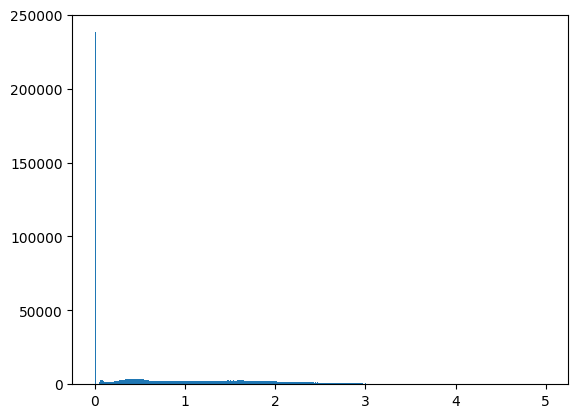

In [ ]:
plt.hist(data['G/A'],bins=500)

In [ ]:
np.any(np.isnan(data))

False

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
#data = np.random.rand(100,3)
estimator = KMeans(n_clusters=120)
estimator.fit(data[['R/A','Ye/A','B/A','G/A']])
#estimator.fit(sample[['X_coor','Y_coor','G/A']])
centers = estimator.cluster_centers_
labels = estimator.labels_
print(centers)
#print(labels)

[[7.03333123e-01 2.14386217e-02 2.75228255e-01 2.57139734e+00]
 [9.81814350e-02 4.91587336e-01 4.10231229e-01 6.78221100e-01]
 [3.19350839e-01 3.88606367e-03 6.76763097e-01 1.28291337e-02]
 [7.83916530e-03 5.92902579e-01 3.99258255e-01 1.50943179e+00]
 [5.46359720e-01 3.87782203e-01 6.58580766e-02 3.22478754e-01]
 [3.79188884e-01 4.05511818e-02 5.80259934e-01 3.97182236e+00]
 [7.58964611e-01 1.74052369e-01 6.69830192e-02 1.58412578e+00]
 [1.15558659e-02 7.76507471e-01 2.11936664e-01 1.05289411e-02]
 [7.61893196e-01 2.60385649e-02 2.12068239e-01 5.19429280e-01]
 [2.31827299e-02 4.14558608e-01 5.62258662e-01 1.73192011e+00]
 [7.95394750e-01 1.96651459e-01 7.95379105e-03 1.23704593e-02]
 [3.16046524e-02 3.15417046e-01 6.52978302e-01 3.39184115e-01]
 [1.64675136e-02 2.88335814e-01 6.95196672e-01 3.04366798e+00]
 [1.09732718e-01 5.16634064e-01 3.73633218e-01 2.14028993e+00]
 [8.91249171e-01 4.91841384e-02 5.95666909e-02 2.86369043e+00]
 [4.30525104e-03 1.92104013e-03 9.93773709e-01 7.643942

In [ ]:
a = pd.DataFrame(centers)

In [ ]:
a['X_coor'] = 2*a[0] - 1
a['Y_coor'] = a[2]-a[1]
a[3]

0      2.571397
1      0.678221
2      0.012829
3      1.509432
4      0.322479
         ...   
115    2.113419
116    4.560155
117    0.014974
118    0.009295
119    0.944715
Name: 3, Length: 120, dtype: float64

Text(0.5, 0.92, 'Kmeans center plot')

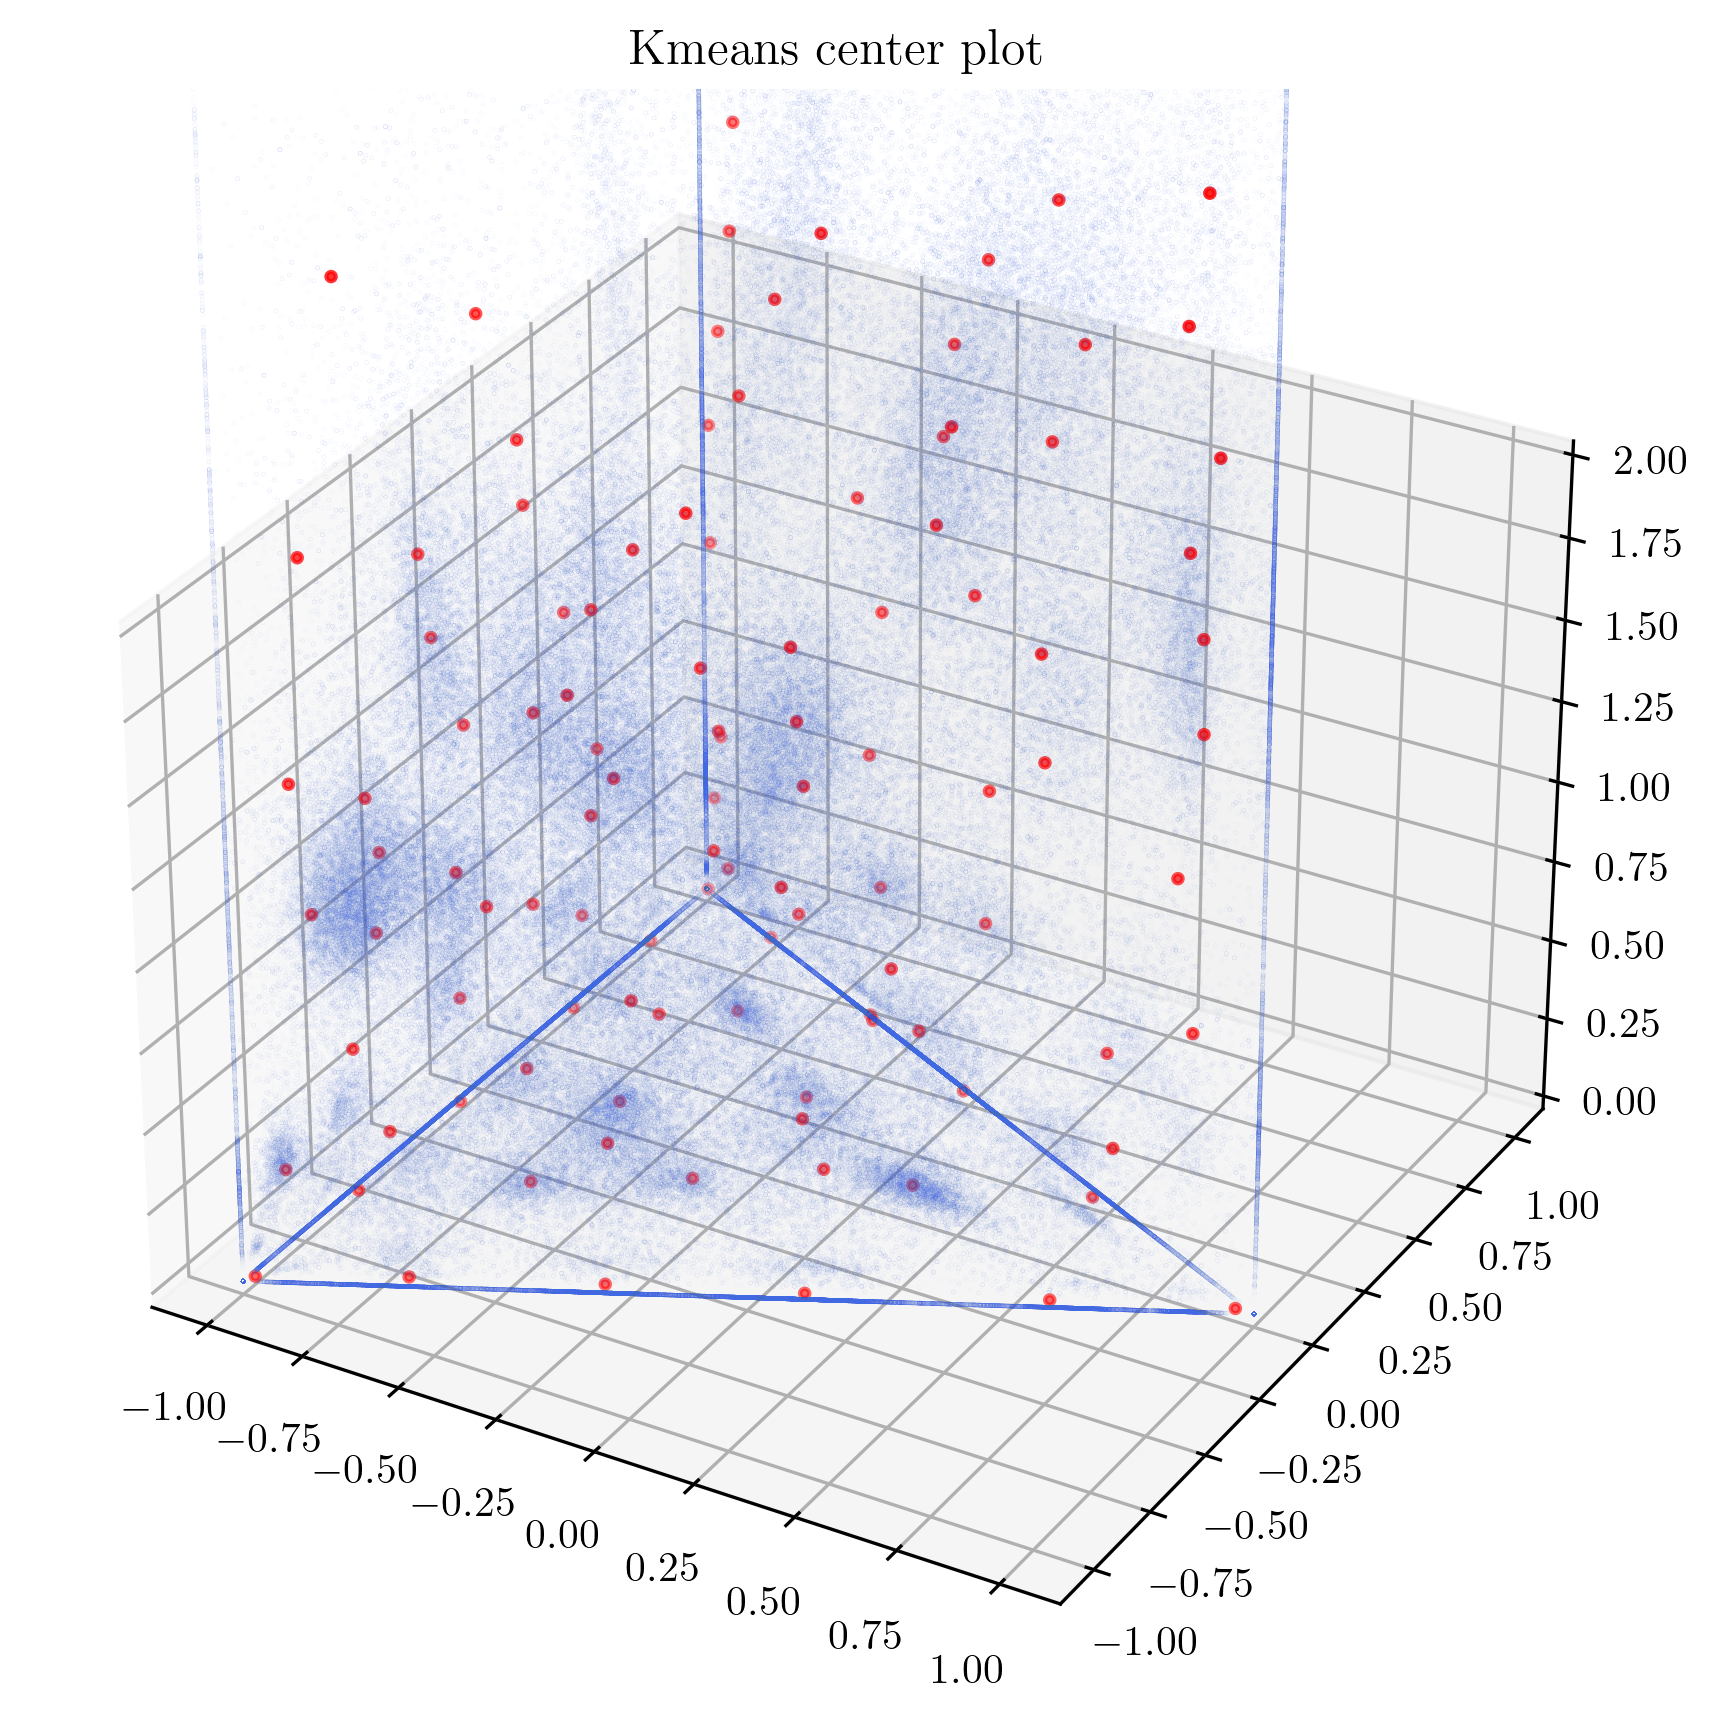

In [ ]:
sample = intensity_all[['X_coor','Y_coor','G/A']].sample(frac=0.5,replace=True, random_state=1)
sample = sample[sample['G/A']<20]
#3D plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(sample['X_coor'], sample['Y_coor'], sample['G/A'], color = "royalblue",s=0.005,alpha=0.1)
ax.scatter3D(a['X_coor'], a['Y_coor'], a[3], color = "red",s=5)
ax.set_zlim3d(0,2)
plt.title("Kmeans center plot")
#plt.savefig(read_dir/'colorcoding_3D.jpg')

In [ ]:
data

R/A      Ye/A       B/A       G/A
93      0.958085  0.000000  0.041915  0.000000
99      1.000000  0.000000  0.000000  2.889306
101     0.934450  0.065550  0.000000  2.033972
102     0.709439  0.290561  0.000000  1.349251
103     0.715421  0.196684  0.087895  0.796700
...          ...       ...       ...       ...
890897  0.000000  1.000000  0.000000  0.330846
891447  0.389515  0.453777  0.156708  0.186020
892767  1.000000  0.000000  0.000000  0.308123
893155  0.000000  0.651078  0.348922  0.092411
894477  0.289793  0.442142  0.268065  0.083375

[1212198 rows x 4 columns]

In [ ]:
np.array(data)

array([[0.95808545, 0.        , 0.04191455, 0.        ],
       [1.        , 0.        , 0.        , 2.88930648],
       [0.93445021, 0.06554979, 0.        , 2.03397155],
       ...,
       [1.        , 0.        , 0.        , 0.30812325],
       [0.        , 0.65107813, 0.34892187, 0.09241109],
       [0.28979282, 0.4421425 , 0.26806468, 0.08337544]])

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()

fea_info = mt.json_load('fea.json')
fea_list = list(fea_info.values())

data = scaler.fit_transform(fea_list)
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
new_data = tsne.fit_transform(np.array(fea_list))

plt.scatter(new_data[:, 0], new_data[:, 1])
plt.show()

In [ ]:
data = intensity_all[['R/A','Ye/A','B/A','G/A']].sample(frac=0.5,replace=True, random_state=1)
#data.loc[data['G/A']>10,'G/A'] = 10
data = data.drop(data[data['G/A']>0.15].index)
#data.loc[data == np.nan] = 0
data

R/A      Ye/A       B/A  G/A
131197   0.320851  0.282960  0.396189  0.0
208146   0.000000  0.531998  0.468002  0.0
21628    1.000000  0.000000  0.000000  0.0
1667307  0.099815  0.497227  0.402957  0.0
242329   0.543947  0.200297  0.255756  0.0
...           ...       ...       ...  ...
98687    0.332317  0.155996  0.511687  0.0
150483   0.440684  0.000000  0.559316  0.0
292041   0.355289  0.644711  0.000000  0.0
177624   0.743278  0.256722  0.000000  0.0
192983   0.311095  0.191972  0.496934  0.0

[68757 rows x 4 columns]

In [ ]:
np.max(intensity_all['G/A'])

21.341287057122198

In [ ]:
intensity_all.to_csv(read_dir/'Data_for_PRISM30_all_1111_deduplicate_1_Embryo.csv')

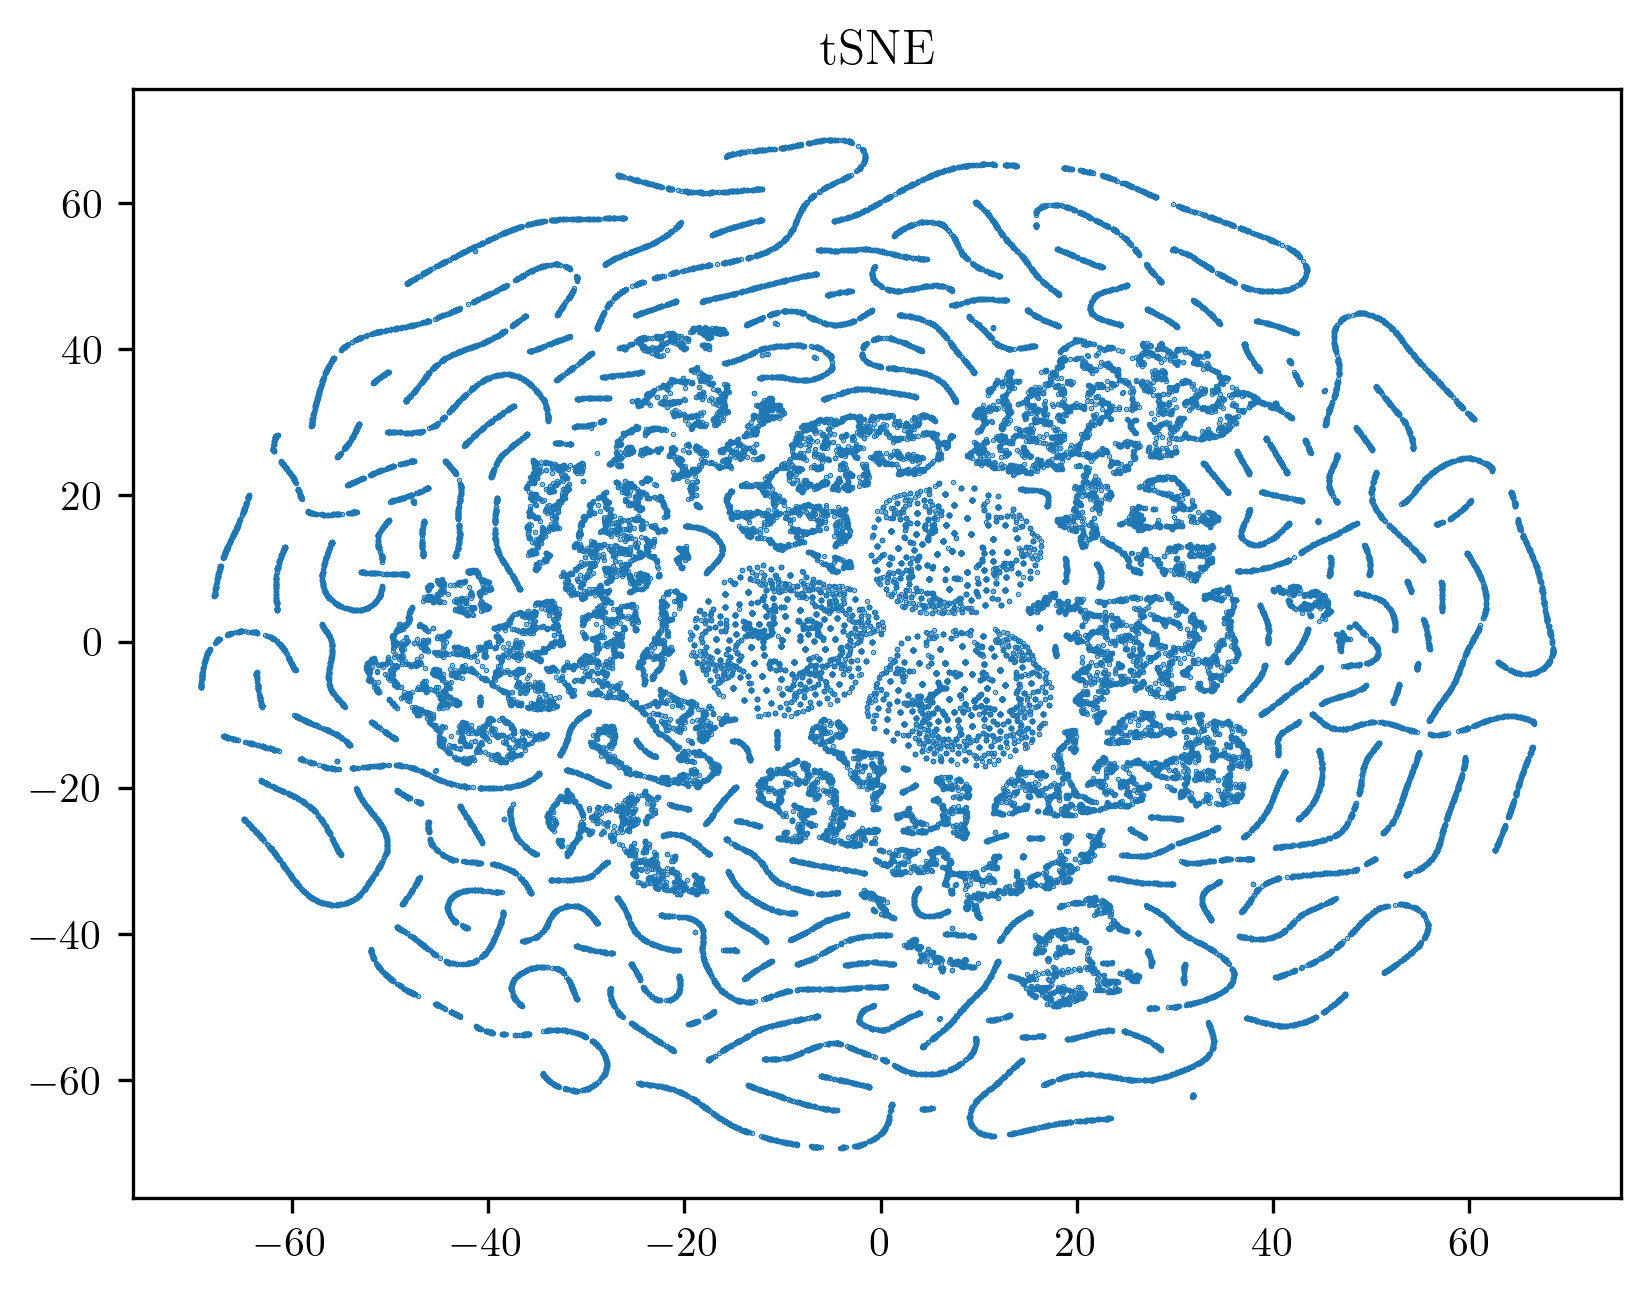

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

X = np.array(data)
ts = TSNE(n_components=2)
new_data = ts.fit_transform(X)
plt.scatter(new_data[:, 0], new_data[:, 1],s=0.1)
#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")
#ax.scatter3D(new_data[:, 0], new_data[:, 1], new_data[:, 2], color = "royalblue",s=0.5,alpha=0.1)
plt.title("tSNE")
plt.savefig(read_dir/'tSNE_1.jpg')
plt.show()


In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import umap


scaler = StandardScaler()


data_1 = scaler.fit_transform(np.array(data))

reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(data_1)

plt.scatter(embedding[:, 0], embedding[:, 1],s=0.1)
plt.show()

In [ ]:

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


scaler = StandardScaler()
data_1 = scaler.fit_transform(np.array(data))

X_pca = PCA(n_components=2).fit_transform(data_1)  

plt.scatter(X_pca[:, 0], X_pca[:, 1],s=0.01)
plt.show()